## Handwritten Digit Recognition with an MLP

In this notebook we use a **Multi‑Layer Perceptron (MLP)** to recognise
handwritten digits from the digits dataset provided by scikit‑learn.  An MLP
is a feed‑forward neural network consisting of one or more hidden layers.
We'll compare the true labels to our predictions and visualise some
misclassified examples.


Dataset size: (1797, 64)


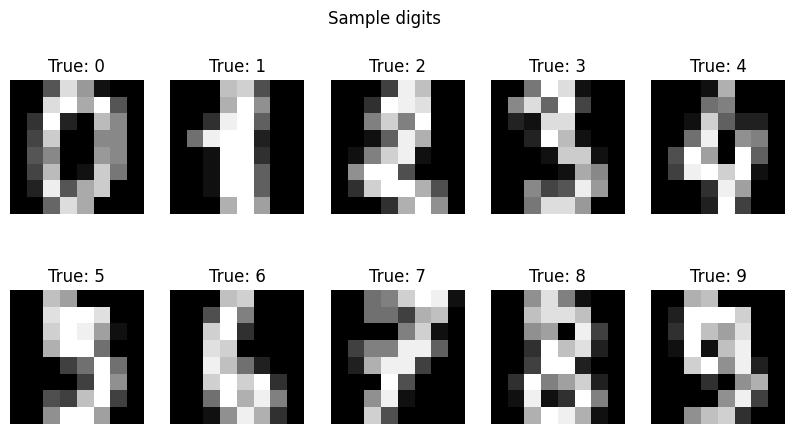

Accuracy: 0.974

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.95      0.95      0.95        55
           2       0.95      1.00      0.97        53
           3       0.98      1.00      0.99        55
           4       0.98      0.94      0.96        54
           5       1.00      0.98      0.99        55
           6       1.00      0.98      0.99        54
           7       0.96      1.00      0.98        54
           8       0.94      0.92      0.93        52
           9       0.98      0.98      0.98        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



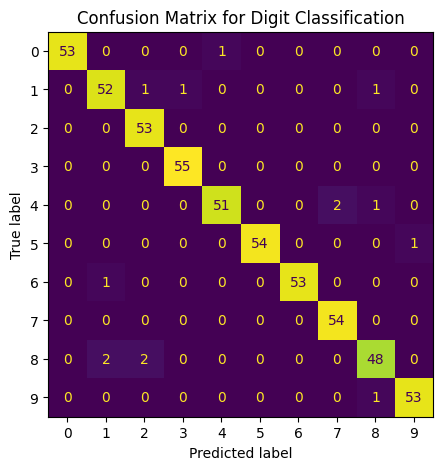

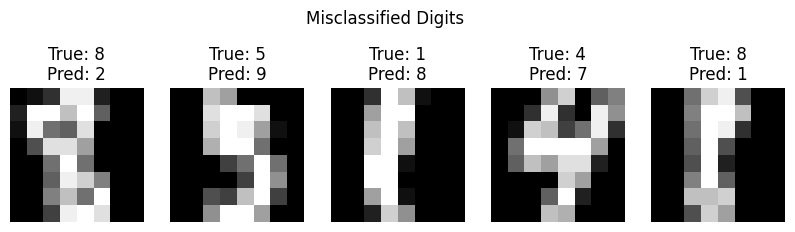

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Load digits dataset
digits = load_digits()
X = digits.data  # flattened 8x8 images
y = digits.target

print('Dataset size:', X.shape)

# Visualise some samples
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, image, label in zip(axes.ravel(), digits.images[:10], y[:10]):
    ax.imshow(image, cmap='gray')
    ax.set_title(f'True: {label}')
    ax.axis('off')
plt.suptitle('Sample digits')
plt.show()

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardise features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the MLP
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=200, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Evaluate performance
y_pred = mlp.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
# Print an empty line before the classification report
print()
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, colorbar=False)
plt.title('Confusion Matrix for Digit Classification')
plt.show()

# Visualize some misclassified digits
mis_idx = np.where(y_test != y_pred)[0]
if len(mis_idx) > 0:
    n_show = min(5, len(mis_idx))
    fig, axes = plt.subplots(1, n_show, figsize=(10, 3))
    for i, idx in enumerate(mis_idx[:n_show]):
        axes[i].imshow(X_test[idx].reshape(8, 8), cmap='gray')
        axes[i].set_title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
        axes[i].axis('off')
    plt.suptitle('Misclassified Digits')
    plt.show()
else:
    print('No misclassified samples found.')


### Interpretation

The MLP achieves high accuracy on the digits dataset, correctly identifying the vast majority of handwritten numbers.  A few misclassifications remain, often involving ambiguous or poorly written digits.  In a production environment (e.g., automated mail sorting), even small improvements in accuracy can translate into significant cost savings through reduced manual intervention.
